In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree 
import pandas as pd

%matplotlib inline

iris = datasets.load_iris()

tts = train_test_split(iris.data, iris.target,
                       test_size=.33, random_state=21)

(iris_train_ftrs, iris_test_ftrs,
 iris_train_tgt, iris_test_tgt) = tts

useclass = 1
tts_1c = train_test_split(iris.data, iris.target, test_size=.33,
                          random_state=21, stratify=iris.target)

(iris_1c_train_ftrs, iris_1c_test_ftrs,
 iris_1c_train_tgt, iris_1c_test_tgt) = tts_1c

In [17]:
data = {
    'x1': [0, 0, 1, 1],
    'x2': [0, 1, 0, 1],
    'tgt': [0, 1, 1, 0]
}
xor_df = pd.DataFrame(data)

# Creating and fitting the DecisionTreeClassifier
dtc_xor = tree.DecisionTreeClassifier(max_depth=2)
dtc_xor.fit(xor_df[['x1', 'x2']], xor_df['tgt'])

DecisionTreeClassifier(max_depth=2)

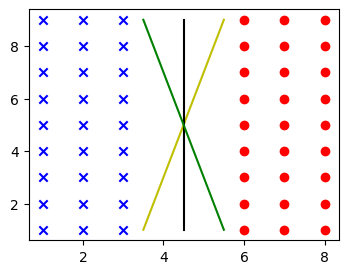

In [28]:
fig, ax = plt.subplots(1,1,figsize=(4,3))

# fancy way to get cross-product of points
left  = np.mgrid[1:4.0, 1:10].reshape(2, -1).T
right = np.mgrid[6:9.0, 1:10].reshape(2, -1).T

# data points
ax.scatter(left[:,0] , left[:,1] , c='b', marker='x')
ax.scatter(right[:,0], right[:,1], c='r', marker='o')

# separating lines
ax.plot([3.5, 5.5], [1,9], 'y')
ax.plot([4.5, 4.5], [1,9], 'k')
ax.plot([3.5, 5.5], [9,1], 'g');

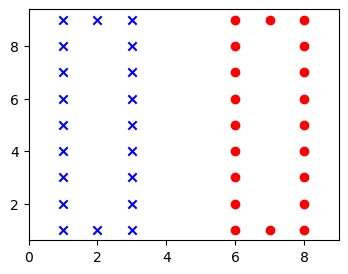

In [29]:
fig, ax = plt.subplots(1,1,figsize=(4,3))

# fancy way to get cross-product of points
left  = np.mgrid[1:4:2, 1:10].reshape(2, -1).T
right = np.mgrid[6:9:2, 1:10].reshape(2, -1).T

ax.scatter(left[:,0] , left[:,1] , c='b', marker='x')
ax.scatter([2,2], [1,9], c='b', marker='x')
ax.scatter(right[:,0], right[:,1], c='r', marker='o')
ax.scatter([7,7], [1,9], c='r', marker='o')
ax.set_xlim(0,9);

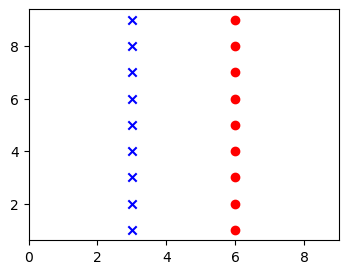

In [30]:
fig, ax = plt.subplots(1,1,figsize=(4,3))

left  = np.mgrid[3:4, 1:10].reshape(2, -1).T
right = np.mgrid[6:7, 1:10].reshape(2, -1).T

ax.scatter(left[:,0] , left[:,1] , c='b', marker='x')
ax.scatter(right[:,0], right[:,1], c='r', marker='o')
ax.set_xlim(0,9);

NameError: name 'do_linear_svc_separators' is not defined

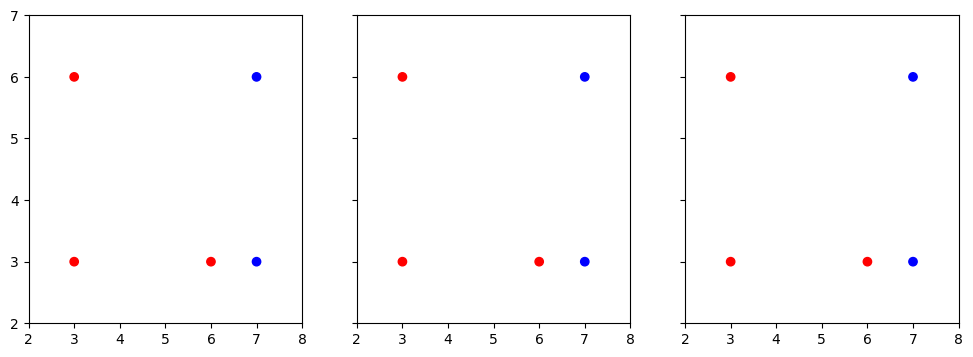

In [36]:
ftrs = np.array([[3,3],
                 [3,6],
                 [7,3],
                 [7,6],
                 [6,3]])
tgt  = np.array([0,0,1,1,0])
colors = np.array(['r', 'b'])

Cs = [.1, 1.0, 10]
nus = [.3, .4, .5]

fig, axes = plt.subplots(1,3,figsize=(12,4),
                         sharex=True, sharey=True)
for ax in axes:
    ax.scatter(ftrs[:,0], ftrs[:,1], c=colors[tgt])
ax.set_xlim(2,8); ax.set_ylim(2,7)

do_linear_svc_separators(svm.SVC, ftrs, tgt,
                         "C", Cs, axes[1])
do_linear_svc_separators(svm.NuSVC, ftrs, tgt,
                         "nu", nus, axes[2])

axes[0].set_title("No Boundary")
axes[1].set_title("C Boundaries (SVC)")
axes[2].set_title(r"$\nu$ Boundaries (NuSVC)");

LinAlgError: singular matrix

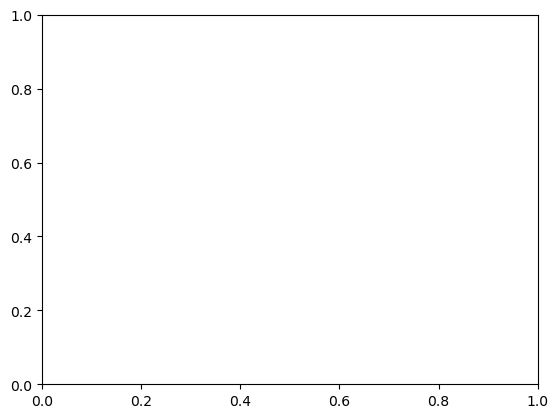

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install seaborn

data = {
    'height': [165, 170, 155, 180, 150],
    'weight': [60, 70, 50, 85, 45],
    'species': ['cat', 'dog', 'cat', 'dog', 'cat']
}

cd_df = pd.DataFrame(data)

sns.kdeplot(data=cd_df, x='height', y='weight', hue='species')
plt.title('Kernel Density Plot for Height vs. Weight')
plt.show()

NameError: name 'cd_df' is not defined

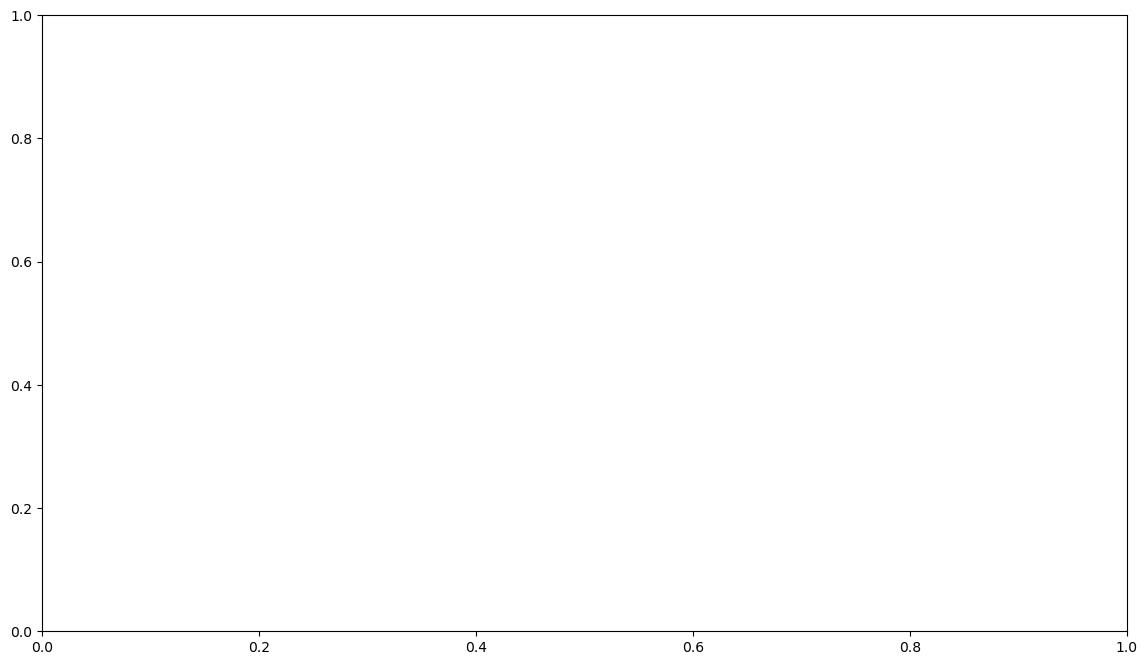

In [34]:
fig, axes = plt.subplots(1,1,figsize=(14,8))
tgt = cd_df['species']=='cat'
svm_mod = plot_boundary(cd_df.values, tgt, [0,1],
                        svm.SVC(kernel='linear'),
                        show_data=True)

In [25]:
!pip install pydotplus
!pip install graphviz
import pydotplus 
from sklearn import tree
from IPython.display import Image

dot_data = tree.export_graphviz(dtc_xor, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data)

import os
if not os.path.exists("outputs"):
    os.makedirs("outputs")

graph.write_png("outputs/xor_tree.png")  

Image("outputs/xor_tree.png", width=400, height=400)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 936.8 kB/s eta 0:00:00 0:00:01


InvocationException: GraphViz's executables not found

In [27]:
dtc = tree.DecisionTreeClassifier(max_depth=3)
plot_boundary(iris.data, iris.target, [0,1], dtc, 
              show_data=True)
plt.title('DTC for Iris');

TypeError: plot_boundary() got an unexpected keyword argument 'show_data'

In [20]:
iris_1c_tree = (tree.DecisionTreeClassifier()
               .fit(iris_1c_train_ftrs, iris_1c_train_tgt))

In [21]:
import pydotplus
dot_data = tree.export_graphviz(iris_1c_tree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("outputs/iris_1c.png")
Image("outputs/iris_1c.png", width=75, height=75)

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/iris_1c.png'

In [22]:
iris_tree = (tree.DecisionTreeClassifier()
            .fit(iris_train_ftrs, iris_train_tgt))

In [23]:
with open("outputs/iris.dot", 'w') as f:
    dot_data = tree.export_graphviz(iris_tree, out_file=f,
                                   feature_names=iris.feature_names,
                                   class_names=iris.target_names,
                                   filled=True, rounded=True)
!dot -Tpng outputs/iris.dot -o outputs/iris.png
!rm outputs/iris.dot

Image("outputs/iris.png", width=140, height=140)

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/iris.dot'